In [1]:
import numpy as np
import pandas as pd

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [15]:
pd.crosstab(data.Species,data.Height,margins=True).style.background_gradient()

Height,1.7284,1.7388,1.972,1.9782,2.0832,2.0904,2.112,2.196,2.2044,2.2139,2.277,2.43,2.8728,2.9322,3.528,3.824,4.1472,4.588,4.5924,5.082,5.1376,5.1992,5.2185,5.2224,5.2983,5.5225,5.568,5.5756,5.6166,5.6358,5.64,5.6925,5.7078,5.8045,5.856,5.875,5.9175,5.9364,5.9532,6.11,6.1146,6.1677,6.216,6.275,6.2884,6.375,6.384,6.396,6.4,6.4395,6.4752,6.55,6.561,6.5772,6.6339,6.7334,6.792,6.825,6.8475,6.9153,6.96,7.0334,7.0516,7.0866,7.1672,7.168,7.28,7.2828,7.29,7.293,7.3968,7.4052,7.5344,7.5852,7.6156,7.68,7.786,7.792,7.8204,8.1454,8.323,8.3804,8.3922,8.5376,8.568,8.778,8.8768,8.8928,8.9262,9.396,9.485,9.6,9.7364,10.03,10.2565,10.3458,10.5717,10.6091,10.6863,10.744,10.812,10.835,10.881,11.088,11.135,11.1366,11.368,11.4884,11.52,11.73,11.7612,11.9286,11.9328,12.354,12.3778,12.3808,12.4313,12.444,12.48,12.4888,12.5125,12.604,12.67,12.73,12.8002,13.6024,13.7592,13.9129,14.0049,14.1795,14.2266,14.2628,14.3714,14.4738,14.8604,14.938,14.9544,15.1285,15.438,15.4686,15.5227,15.633,15.9936,16.2405,16.36,16.3618,16.517,16.8896,17.6235,18.0369,18.084,18.6354,18.7542,18.957,All
Species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bream,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,35
Parkki,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
Perch,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,1,2,0,0,1,1,1,0,1,2,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,1,2,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56
Pike,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
Roach,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20
Smelt,1,1,1,1,1,1,0,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
Whitefish,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
All,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,159


In [12]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Text(0.5, 0, 'diagonal width')

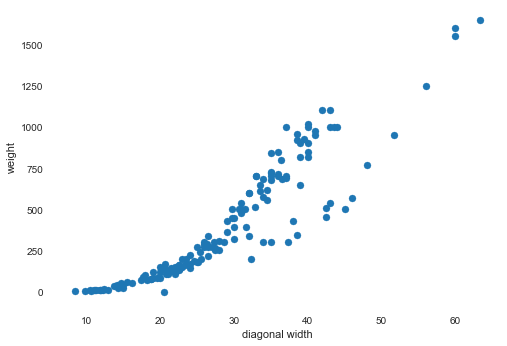

In [13]:
y = data.Weight.values.reshape(-1,1)
x = data.Length2.values.reshape(-1,1)

plt.scatter(x,y)
plt.ylabel("weight")
plt.xlabel("diagonal width")

In [16]:
# Average of 3 lengths on length1
data['Length1'] = data['Length1'].replace([data['Length1']],[(data['Length1'] +data['Length2'] + data['Length3'])/3])
#taking species as categorial data
data['Species'] = data['Species'].replace(['Bream','Roach','Whitefish','Parkki','Perch','Pike','Smelt'],[1,2,3,4,5,6,7])
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,26.200000,25.4,30.0,11.5200,4.0200
1,1,290.0,27.166667,26.3,31.2,12.4800,4.3056
2,1,340.0,27.166667,26.5,31.1,12.3778,4.6961
3,1,363.0,29.600000,29.0,33.5,12.7300,4.4555
4,1,430.0,29.833333,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,7,12.2,12.366667,12.2,13.4,2.0904,1.3936
155,7,13.4,12.533333,12.4,13.5,2.4300,1.2690
156,7,12.2,12.966667,13.0,13.8,2.2770,1.2558
157,7,19.7,14.233333,14.3,15.2,2.8728,2.0672


In [17]:
X = data[['Species','Length1','Height','Width']]
Y = data.Weight
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8953807587296455

In [20]:
# Create a Pickle file  
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(LR, pickle_out)
pickle_out.close()

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 05 11:45:03 2022

@author: noopa
"""


import numpy as np
import pickle
import pandas as pd
from flask import Flask, request
from flask import Flask, request, jsonify, render_template

app=Flask(__name__)
pickle_in = open("model.pkl","rb")
result=pickle.load(pickle_in)

@app.route('/')
def home():
    return render_template('index.html')



@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [x for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = result.predict(final_features)

    
    return render_template('index.html', prediction_text='The fish weight is {}'.format(prediction))
    
    


if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Mar/2022 17:01:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Mar/2022 17:01:41] "POST /predict HTTP/1.1" 200 -
